# Análise das cotacoes Morning Star

### Inicializações

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style("whitegrid")


In [2]:
#Get and show the Metadata
metadata_xls = 'D:\\Personal\\Python\\Fundos\\cotacoes_morningstar\\metadata.xlsx'
df_funds = pd.read_excel(metadata_xls,sheet_name='metadata').set_index('Code',drop=True)
df_funds

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Personal\\Python\\Fundos\\cotacoes_morningstar\\metadata.xlsx'

In [ ]:
#Get the Quotes
f_quotes_csv = lambda code: 'D:\\Personal\\Python\\Fundos\\cotacoes_morningstar\\{}.csv'.format(code)
df = pd.DataFrame()
for code in df_funds.index:
    df_tmp = pd.read_csv(f_quotes_csv(code), sep=';', parse_dates=[0], usecols=['date','price'])
    df_tmp['date'] = df_tmp['date'].apply(lambda x: x.date())
    df[code] = df_tmp.set_index('date',drop=True)['price']
df.dropna(inplace=True)

In [ ]:
#Create a DataFrame with the daily growth
df_grow = df.apply(lambda x: x/x.shift(1), axis=0).dropna()
df_grow

,LU1071462615,LU1433232854,LU0336084032,LU1627461624,LU0096354914,LU0073234253,LU0361831018,LU0173797399,LU0384406244,LU0823415012,LU1861215546,LU2048585785,LU0301638341
date,,,,,,,,,,,,,
2019-12-03,0.997539,0.999710,1.000353,1.001930,1.001079,1.002013,1.001629,1.000059,0.987142,0.999521,0.983568,0.997419,0.997115
2019-12-04,1.002387,1.000097,1.000672,1.000578,0.999281,1.000804,0.999254,1.000059,1.004383,1.008672,1.013126,0.995521,0.991321
2019-12-05,0.999127,1.001545,0.999555,0.997786,1.000360,0.997190,1.000068,0.999941,0.996696,0.998301,0.995289,1.009598,1.001946
2019-12-06,1.000953,1.001639,1.000227,0.999614,1.000000,1.000805,1.000339,1.000059,1.013074,1.010264,1.013018,1.001584,1.008738
2019-12-09,0.998095,0.999519,0.999731,1.001061,1.000359,1.001810,1.001356,1.000059,0.977030,0.996531,0.998832,1.007811,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-19,0.996601,0.999300,1.000663,1.000450,1.000345,1.000581,1.000402,0.999882,1.012222,1.011967,1.000844,0.995924,0.990580
2020-11-20,1.000816,1.001926,1.001130,1.000540,1.000689,1.000967,1.000737,1.000236,1.013089,1.020728,1.007589,1.008609,1.005121
2020-11-23,1.002371,1.000437,1.001324,1.000629,1.000689,1.000000,1.000402,1.000059,1.025418,1.036731,1.011715,1.011473,1.016012


In [ ]:
# Calculate the Portofolio Std and Growth
df_funds['STD'] = df_grow.std(axis=0)
df_funds['Growth'] = df.apply(lambda x: x[-1]/x[0]-1)
df_funds['Racio'] = df_funds['Growth']/df_funds['STD']

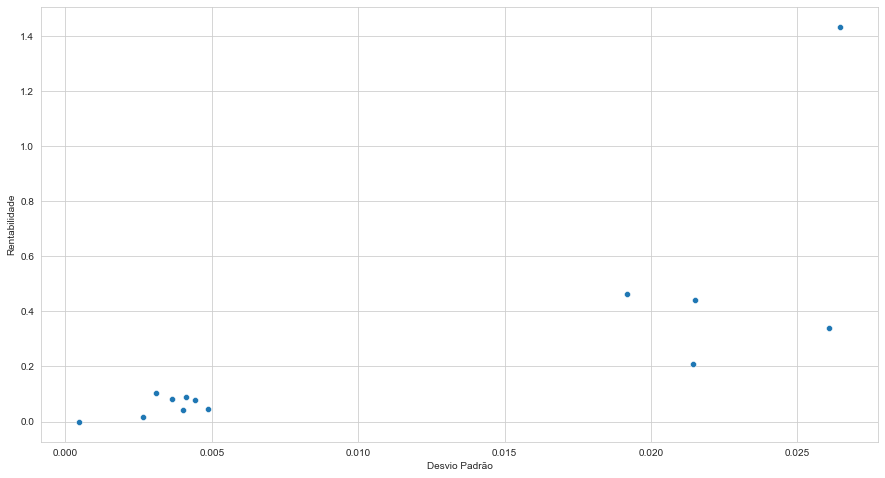

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel('Desvio Padrão')
plt.ylabel('Rentabilidade')
p = sn.scatterplot(x=df_funds['STD'],y=df_funds['Growth'])

In [ ]:
df_funds.sort_values(by=['Racio'],ascending=False)

,Name,SRRI,STD,Growth,Racio
Code,,,,,
LU0823415012,BNP Paribas Funds Energy TransitionN Capitalis...,7,0.026465,1.433053,54.148891
LU1433232854,Pictet TR - Atlas P EUR,3,0.003097,0.104064,33.599105
LU2048585785,Allianz Global Investors Fund - Allianz Smart ...,6,0.019197,0.462126,24.072454
LU0336084032,Carmignac Portfolio Unconstrained Euro Fixed I...,3,0.003643,0.082369,22.611232
LU1071462615,Pictet TR - Agora P EUR,3,0.004129,0.087871,21.280749
LU1861215546,BGF Future of Transport Fund E2 EUR Hedged,7,0.021500,0.440141,20.471803
LU1627461624,Janus Henderson Horizon Strategic Bond Fund A2...,3,0.004435,0.077190,17.405258
LU0301638341,JPMorgan Funds - Korea Equity Fund D (acc) - USD,6,0.026090,0.340385,13.046457
LU0073234253,Morgan Stanley Investment Funds - Euro Strateg...,3,0.004013,0.042472,10.582390


In [ ]:
#### Performance in the last days
df_funds_tmp = df_funds.copy()
start = -30
last = -1
print('Start Date:',df.index[start])
df_funds_tmp['Growth'] = df.apply(lambda x: x[last]/x[start]-1)
df_funds_tmp['Racio'] = df_funds_tmp['Growth']/df_funds_tmp['STD']
df_funds_tmp.sort_values(by=['Racio'],ascending=False)

Start Date: 2020-10-14


,Name,SRRI,STD,Growth,Racio
Code,,,,,
LU1071462615,Pictet TR - Agora P EUR,3,0.004129,0.055937,13.546786
LU0823415012,BNP Paribas Funds Energy TransitionN Capitalis...,7,0.026465,0.235579,8.901530
LU1861215546,BGF Future of Transport Fund E2 EUR Hedged,7,0.021500,0.154280,7.175877
LU2048585785,Allianz Global Investors Fund - Allianz Smart ...,6,0.019197,0.135106,7.037754
LU0301638341,JPMorgan Funds - Korea Equity Fund D (acc) - USD,6,0.026090,0.125101,4.794939
LU0336084032,Carmignac Portfolio Unconstrained Euro Fixed I...,3,0.003643,0.015942,4.376301
LU0384406244,Vontobel Fund - Future Resources C EUR,6,0.021451,0.082393,3.840896
LU1627461624,Janus Henderson Horizon Strategic Bond Fund A2...,3,0.004435,0.016758,3.778621
LU0096354914,Threadneedle (Lux) - European Strategic Bond C...,2,0.004853,0.015701,3.235302


<AxesSubplot:xlabel='date'>

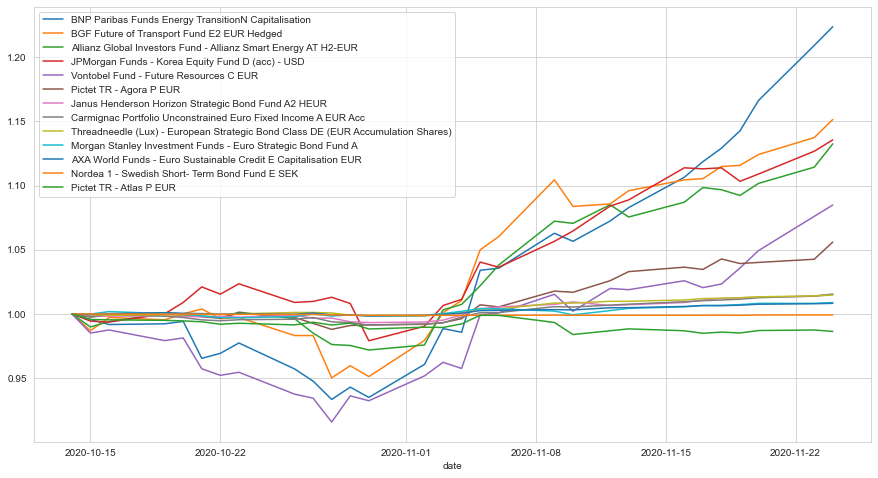

In [ ]:
code2name_dict = {x[0]:x[1] for x in df_funds.itertuples()}
df_plot = df.apply(lambda x: x/x[start], axis=0)
df_plot = df_plot.sort_values(by=df_plot.index[last],axis=1,ascending=False).rename(columns=code2name_dict)
ax = df_plot.iloc[start:last].plot(figsize=(15,8),grid=True)
ax.legend(loc='upper left')
ax